In [1]:
###importaciones
###aquí se hacen las importaciones necesarias para entrenar y crear los modelos, cada uno cumple una función.
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import category_encoders
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import joblib
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import graphviz
import xgboost as xgb

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [3]:
##lectura del csv y objetos a usar
##Aquí se carga el archivo con los datos por medio de la librería Pandas, usando el comando read_csv, el cual es la extensión del archivo y a su vez se le agrega a una variable llamada data.
data=pd.read_csv('Historial_FrioCru_7.csv')
##Aquí de asignan los objetos como label encoder y el árbol de decisiones a una variable con un nombre más corto, con el fin de hacer la programación más amena. 
le=LabelEncoder()
dt=DecisionTreeClassifier()
##Aquí sólo se llama a la variable data y al eecutarlo se mostrará su contenido. 
data

,Estatus,FECHA_ALTA,IdMaterial,NECESIDAD_ORIGEN,ACEROOrigen,C_ACEROOrigen,NECESIDAD_DESTINO,ACERODestino,C_ACERODestino,PRO_ORIGEN,...,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion,Pedido
0,OK,04-12-2015 16:33:46,3A397285CTD00,3000931180,UBCTIS,IF,3000995979,UBCIMS,IF,MP501141,...,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
1,OK,15-09-2017 12:39:12,3A679729PDT00,3001527416,UBCIMS,IF,3001477521,UBCIMS,IF,MP501141,...,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
2,OK,25-09-2017 22:42:32,3A686394CS300,3001473793,UBCIMS,IF,3001575868,UBCIMS,IF,MP501141,...,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
3,OK,08-08-2017 12:16:55,3A667174CM300,3001544574,UBCIMS,IF,3001549129,UBCIMS,IF,MP501141,...,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
4,OK,04-08-2017 16:15:53,3A666439CM300,3001523759,UBCIMS,IF,3001547888,UBCIMS,IF,MP501141,...,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64634,OK,30-12-2016 15:18:35,2A416967GM200,3001320265,7061,CS,3001105911,APM50M,HS,MP517074,...,CORTADOS 98% EN ESPESOR,TER \ GA050 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado,1
64635,OK,21-06-2017 11:14:24,3A639317CM300,3001455189,ACE517,CS,3001499271,APM50M,HS,MP509028,...,CORTADOS 98% EN ESPESOR,TER \ GA050 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado,1
64636,OK,08-09-2017 21:05:39,3A643180CM300,3001344984,ACE523,CS,3001568185,UBCIMS,IF,MP532767,...,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,Rechazado,1
64637,OK,04-03-2016 14:44:08,2A316692CTD00,3000959764,C091TM,SS,3001068899,6066,CS,MP518488,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),TER \ COMERCIAL,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado,1


In [4]:
###limpieza de datos
##Se crea una variable "de" la cual será llamada cuando se use el comando drop
##ésta variable contiene las columnas que no se utilizarán en el analítico. 
de=['Estatus', 'FECHA_ALTA', 'IdMaterial', 'NECESIDAD_ORIGEN','NECESIDAD_DESTINO', 'PRO_ORIGEN', 'PRO_DESTINO', 'Pedido']
##Se crea una nueva variable para datos, se mete la variable data pero se le aplica el comando drop
##el cual en conjunto con la variable de desecahrá las columnas que contiene la variable. 
datac=data.drop(de,axis=1)
datac

,ACEROOrigen,C_ACEROOrigen,ACERODestino,C_ACERODestino,CCLASEPRODTOOrigen,ACABSUPEROrigen,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,...,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion
0,UBCTIS,IF,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
1,UBCIMS,IF,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
2,UBCIMS,IF,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
3,UBCIMS,IF,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
4,UBCIMS,IF,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64634,7061,CS,APM50M,HS,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ GA050 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado
64635,ACE517,CS,APM50M,HS,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ 50LCTGLV (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ GA050 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado
64636,ACE523,CS,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS IFTIS \ GAL (V 2016 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,Rechazado
64637,C091TM,SS,6066,CS,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ GA040 GAL SS (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),TER \ COMERCIAL,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado


In [5]:
##Aquí se utiliza la función de pandas "dataframe" para convertir el csv a un dataframe de pandas.  
main_df=datac
main_df=pd.DataFrame(data=main_df)
print(main_df.head(10))

  ACEROOrigen C_ACEROOrigen ACERODestino C_ACERODestino CCLASEPRODTOOrigen  \
0      UBCTIS            IF       UBCIMS             IF   M-P-FRIO-BOB-CRU   
1      UBCIMS            IF       UBCIMS             IF   M-P-FRIO-BOB-CRU   
2      UBCIMS            IF       UBCIMS             IF   M-P-FRIO-BOB-CRU   
3      UBCIMS            IF       UBCIMS             IF   M-P-FRIO-BOB-CRU   
4      UBCIMS            IF       UBCIMS             IF   M-P-FRIO-BOB-CRU   
5      ACE523            CS       ACE523             CS   M-P-FRIO-BOB-CRU   
6      UBCIMS            IF       UBCIMS             IF   M-P-FRIO-BOB-CRU   
7      UBCIMS            IF       UBCIMS             IF   M-P-FRIO-BOB-CRU   
8      UBCTIS            IF       UBCTIS             IF   M-P-FRIO-BOB-CRU   
9      UBCTIS            IF       UBCTIS             IF   M-P-FRIO-BOB-CRU   

  ACABSUPEROrigen BORDESOrigen  DIAM__INTERNOOrigen           EXTREMOSOrigen  \
0            MATE   LAMINACION                  508  CORTADOS

In [7]:
## esto es solo para apoyarnos y sacar los nombres de las columnas.
main_df.columns

Index(['ACEROOrigen', 'C_ACEROOrigen', 'ACERODestino', 'C_ACERODestino',
       'CCLASEPRODTOOrigen', 'ACABSUPEROrigen', 'BORDESOrigen',
       'DIAM__INTERNOOrigen', 'EXTREMOSOrigen', 'NORMAOrigen',
       'NORTOLANCHOOrigen', 'NORTOLESPESOROrigen', 'PLANITUDOrigen',
       'SOLDAOrigen', 'SUPERFICIEOrigen', 'USOGRALOrigen',
       'CCLASEPRODTODestino', 'ACABSUPERDestino', 'BORDESDestino',
       'DIAM__INTERNODestino', 'EXTREMOSDestino', 'NORMADestino',
       'NORTOLANCHODestino', 'NORTOLESPESORDestino', 'PLANITUDDestino',
       'SOLDADestino', 'SUPERFICIEDestino', 'USOGRALDestino', 'Reasignacion'],
      dtype='object')

In [8]:
## aquí se utiliza le, el cual es Label Encoder (objeto que se asignó en el segundo bloque)
##y este lo utilizamos para encodificar la variable objetivo, por lo cual OK y RECHAZADO se convierten a 1 y 0
##pero esto es sólo el entrenamiento de ese objeto, por eso sólo se usa el comando fit.
encobj=le.fit(main_df['Reasignacion'])

In [9]:
###codificación de variable objetivo usando LE
##aquí ya se utiliza el comando transform para hacer la codificación
main_df.Reasignacion=encobj.transform(main_df['Reasignacion'])
## al aplicarse sobre la misma variable que contenía el dataframe 
## obtenemos que la columna de Reasignación (variable objetivo) ahora está codificada en 1 y 0.
main_df

,ACEROOrigen,C_ACEROOrigen,ACERODestino,C_ACERODestino,CCLASEPRODTOOrigen,ACABSUPEROrigen,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,...,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion
0,UBCTIS,IF,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
1,UBCIMS,IF,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
2,UBCIMS,IF,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
3,UBCIMS,IF,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
4,UBCIMS,IF,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64634,7061,CS,APM50M,HS,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ GA050 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,1
64635,ACE517,CS,APM50M,HS,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ 50LCTGLV (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ GA050 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,1
64636,ACE523,CS,UBCIMS,IF,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ EDDS IFTIS \ GAL (V 2016 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ EDDS GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,1
64637,C091TM,SS,6066,CS,M-P-FRIO-BOB-CRU,MATE,LAMINACION,508,CORTADOS 98% EN ESPESOR,TER \ GA040 GAL SS (V 2011 REV 1),...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),TER \ COMERCIAL,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,1


In [10]:
##Aquí se crea un .pkl (el cual es como un ejecutable) con el encodificado entrenado para un uso futuro. 
joblib.dump(encobj,'EncodificacionObjetivo.pkl')

['EncodificacionObjetivo.pkl']

In [11]:
###Variable objetivo
##aquí separamos la variable objetivo y creamos un data frame a partir de ella.
target_df = pd.DataFrame(main_df, columns=['Reasignacion'])
print(target_df.sample(10))

       Reasignacion
61530             0
51046             1
32537             0
6560              0
37587             0
5411              0
36430             0
54684             0
12448             0
13402             0


In [12]:
##creación de dataset encodificado
## Como ya se creo un data frame con la variable objetivo 
##ésta se eliminará del dataframe que contienen los datos para el analítico. 
main_df=main_df.drop(['Reasignacion'],axis=1)


In [13]:
####encodifiación de atributos usando target
##Ahora usando Target encoder, dentro de una variable llamada enc, encodificamos los datos del analítico
##introduciendo las columnas a codificar, poniendo los argumentos como handle_unknown 
##para que los valores desconocidos no sean un problema. 
##y al final se introduce el fit para entrenar al codificador con el main df como eje X (datos)
##y el target df como eje Y(objetivo).
main_df.columns = main_df.columns.str.strip()
target_df.columns = target_df.columns.str.strip()
enc=category_encoders.target_encoder.TargetEncoder(verbose=0,cols=['ACEROOrigen', 'C_ACEROOrigen', 'ACERODestino', 'C_ACERODestino',
       'CCLASEPRODTOOrigen', 'ACABSUPEROrigen', 'BORDESOrigen',
       'DIAM__INTERNOOrigen', 'EXTREMOSOrigen', 'NORMAOrigen',
       'NORTOLANCHOOrigen', 'NORTOLESPESOROrigen', 'PLANITUDOrigen',
       'SOLDAOrigen', 'SUPERFICIEOrigen', 'USOGRALOrigen',
       'CCLASEPRODTODestino', 'ACABSUPERDestino', 'BORDESDestino',
       'DIAM__INTERNODestino', 'EXTREMOSDestino', 'NORMADestino',
       'NORTOLANCHODestino', 'NORTOLESPESORDestino', 'PLANITUDDestino',
       'SOLDADestino', 'SUPERFICIEDestino', 'USOGRALDestino']
                                                   ,drop_invariant=False, return_df=True, handle_unknown='value',handle_missing='value',min_samples_leaf=1,smoothing=1.0).fit(main_df,target_df)

In [14]:
##aquí se crea el primer pkl que necesitaremos en cada modelo, y es un pkl de la codificación de los datos de entrenamiento
##para utilizar la misma encodificación en cada análisis de nuevos datos.
joblib.dump(enc,'TargetFriocru.pkl')

['TargetFriocru.pkl']

In [15]:
##usamos la variable enc con el comando transform para codificar el maindf 
##y que los datos sean números, de tal forma que el algoritmo pueda entender todo.
codi=enc.transform(main_df)
codi

,ACEROOrigen,C_ACEROOrigen,ACERODestino,C_ACERODestino,CCLASEPRODTOOrigen,ACABSUPEROrigen,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,...,BORDESDestino,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino
0,0.099305,0.105444,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.079080,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
1,0.110690,0.105444,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.079080,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
2,0.110690,0.105444,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.079080,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
3,0.110690,0.105444,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.079080,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
4,0.110690,0.105444,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.079080,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64634,0.022147,0.038865,0.072250,0.060517,0.045514,0.045514,0.045514,0.046988,0.045514,0.016884,...,0.045514,0.047553,0.045514,0.064458,0.048494,0.046595,0.045514,0.045514,0.04257,0.041447
64635,0.400000,0.038865,0.072250,0.060517,0.045514,0.045514,0.045514,0.046988,0.045514,0.095238,...,0.045514,0.047553,0.045514,0.064458,0.048494,0.046595,0.045514,0.045514,0.04257,0.041447
64636,0.112871,0.038865,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.353933,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
64637,0.531250,0.334334,0.047949,0.043012,0.045514,0.045514,0.045514,0.046988,0.045514,0.338403,...,0.045514,0.047553,0.045514,0.040125,0.041673,0.046595,0.045514,0.045514,0.04257,0.041447


In [16]:
###declaración de variable x (atributos)
##aquí sólo se crea X con los datos ya convertidos.
X=codi
X

,ACEROOrigen,C_ACEROOrigen,ACERODestino,C_ACERODestino,CCLASEPRODTOOrigen,ACABSUPEROrigen,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,...,BORDESDestino,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino
0,0.099305,0.105444,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.079080,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
1,0.110690,0.105444,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.079080,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
2,0.110690,0.105444,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.079080,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
3,0.110690,0.105444,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.079080,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
4,0.110690,0.105444,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.079080,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64634,0.022147,0.038865,0.072250,0.060517,0.045514,0.045514,0.045514,0.046988,0.045514,0.016884,...,0.045514,0.047553,0.045514,0.064458,0.048494,0.046595,0.045514,0.045514,0.04257,0.041447
64635,0.400000,0.038865,0.072250,0.060517,0.045514,0.045514,0.045514,0.046988,0.045514,0.095238,...,0.045514,0.047553,0.045514,0.064458,0.048494,0.046595,0.045514,0.045514,0.04257,0.041447
64636,0.112871,0.038865,0.027823,0.078587,0.045514,0.045514,0.045514,0.046988,0.045514,0.353933,...,0.045514,0.047553,0.045514,0.094495,0.048494,0.046595,0.045514,0.045514,0.04257,0.057276
64637,0.531250,0.334334,0.047949,0.043012,0.045514,0.045514,0.045514,0.046988,0.045514,0.338403,...,0.045514,0.047553,0.045514,0.040125,0.041673,0.046595,0.045514,0.045514,0.04257,0.041447


In [17]:
###declaración de y (objetivo)
##Aquí se crea Y con los datos objetivo codificados.
y=target_df
y

,Reasignacion
0,0
1,0
2,0
3,0
4,0
...,...
64634,1
64635,1
64636,1
64637,1


In [18]:
##división de datos 
##Se utiliza la función train_test_split con las variables anteriormente creadas(X,y) para hacer una división aleatoria de los datos de tal forma que unos se usen para apreder y otros para hacer una especie de examen y comprobar que tan bien aprendió el modelo
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [19]:
##entrenamiento
##se utiliza la variable dt (el arbol de decisiones) con el comando fit para entrenarlo, usando X_train & y_train.
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
dt.score(X_train,y_train)

0.9739474824150663

In [21]:
###prueba score
##Se prueba el aprendizaje del modelo con la función score y las variables X_test & y_test (Examen)
dt.score(X_test,y_test)

0.967079207920792

In [22]:
##Para finalizar se crea el segundo PKL que se usará en cada modelo, y éste es el pkl del árbol de decisiones ya entrenado en éste proceso de reasignación. de tal manera que por cada proceso de reasignación tendremos 2 pkl, uno para encodificar y otro para analizar los datos y hacer las predicciones. 
joblib.dump(dt,'ModeloFriocru.pkl')

['ModeloFriocru.pkl']

In [23]:
##Se crea una variable con los nombres de las variables objetivo
nombres=['OK','RECHAZADO']

In [24]:
##exportación y render
##Usando graphviz  podemos exportar el modelo que creamos como un pdf para así visualizarlo, esto es un paso extra y no es necesario para crear o modificar el modelo, sin embargo, te da una perspectiva de qué se creó. 
dot_data=export_graphviz(dt,feature_names= X.columns, class_names=nombres, impurity=False, filled=True)
graph=graphviz.Source(dot_data)

graph.render('ModeloFriocru')

'ModeloFriocru.pdf'

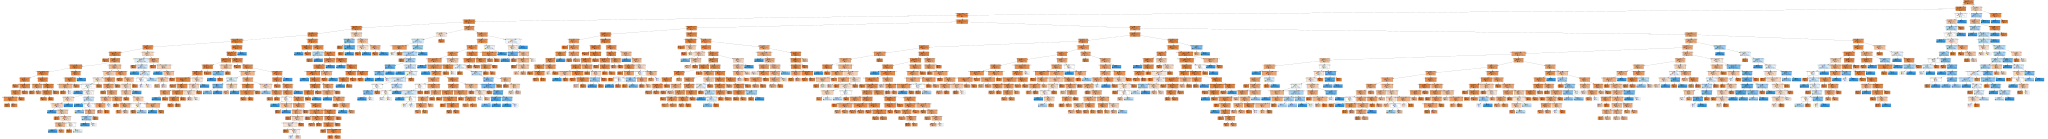

In [25]:
graphviz.Source(dot_data)

Text(0.5, 0, 'Importancia')

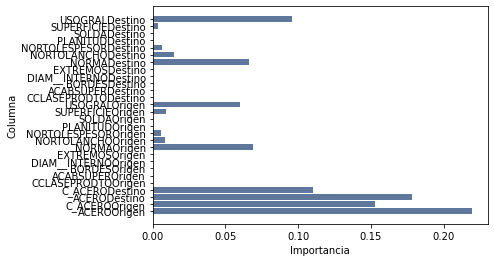

In [26]:
carac=main_df.shape[1]
plt.barh(range(carac),dt.feature_importances_)
plt.yticks(np.arange(carac),X.columns)
plt.ylabel('Columna')
plt.xlabel('Importancia')

In [27]:
# Separando los datos en sets de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, 
                        target_df, random_state=1)

# Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

Precisión modelo inicial train/test  0.958/0.959


In [28]:
# Utilizando AdaBoost para aumentar la precisión
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos
ada = ada.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
# Imprimir la precisión.
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('Precisión modelo con AdaBoost train/test  {0:.3f}/{1:.3f}'
      .format(ada_train, ada_test))

Precisión modelo con AdaBoost train/test  0.970/0.967


In [30]:
# Armando el modelo con parametro max_depth
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=500,
                                  max_depth=1, learning_rate=0.01)
# Ajustando el modelo
gbrt.fit(X_train, y_train)
print('Precisión Gradient Boosting train/test  {0:.3f}/{1:.3f}'
      .format(gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Precisión Gradient Boosting train/test  0.956/0.957
